<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных-и-лемматизация" data-toc-modified-id="Загрузка-данных-и-лемматизация-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка данных и лемматизация</a></span></li><li><span><a href="#Анализ-категорий" data-toc-modified-id="Анализ-категорий-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Анализ категорий</a></span></li><li><span><a href="#Подготовка-данных-к-обучению-и-тестированию-моделей" data-toc-modified-id="Подготовка-данных-к-обучению-и-тестированию-моделей-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Подготовка данных к обучению и тестированию моделей</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Кросс-валидация-модели-градиентного-бустинга-CatBoost" data-toc-modified-id="Кросс-валидация-модели-градиентного-бустинга-CatBoost-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Кросс-валидация модели градиентного бустинга CatBoost</a></span></li><li><span><a href="#Тестирование-лучшей-модели" data-toc-modified-id="Тестирование-лучшей-модели-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Тестирование лучшей модели</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Подготовка

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

import re
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer

#модели машинного обучения
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier, Pool, cv

from sklearn.metrics import confusion_matrix, f1_score, roc_curve, roc_auc_score, RocCurveDisplay
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from pymystem3 import Mystem
from sklearn.utils import resample

### Загрузка данных и лемматизация

In [3]:
data = pd.read_csv("/datasets/toxic_comments.csv", index_col=0)
data.head()

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


In [4]:
data.shape

(159292, 2)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Данные загружены и исследованы.</div>

In [5]:
def lemmatizer(text, vocab):    
    #убираем пунктуацию
    cleaned_text = re.sub(r'[^\w\s]', '', text)
    #убираем числа
    cleaned_text = re.sub(r'\d+', '', cleaned_text)
    cleaned_text = re.sub('\n', ' ', cleaned_text)
    #приводим к нижнему регистру
    cleaned_text = cleaned_text.lower()
    
    #токенизация
    doc = vocab(cleaned_text)

    return " ".join([token.lemma_ for token in doc])

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Скорректировал, по итогу использовал Spacy.

</div>

In [6]:
#лемматизация текста
tqdm.pandas()
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

data['lemm_text'] = data['text'].progress_apply(lemmatizer, vocab=nlp)
data['lemm_text'].values

  0%|          | 0/159292 [00:00<?, ?it/s]

array(['explanation why the edit make under my username hardcore metallica fan be revert they be not vandalism just closure on some gas after I vote at new york doll fac and please do not remove the template from the talk page since I m retire now',
       'daww he match this background colour I m seemingly stuck with thank   talk   january    utc',
       'hey man I m really not try to edit war its just that this guy be constantly remove relevant information and talk to I through edit instead of my talk page he seem to care more about the formatting than the actual info',
       ...,
       'spitzer    umm there s no actual article for prostitution ring    crunch captain',
       'and it look like it be actually you who put on the speedy to have the first version delete now that I look at it',
       '  and   I really do not think you understand   I come here and my idea be bad right away   what kind of community go you have bad idea go away instead of help rewrite they   '],
      dt

### Анализ категорий

In [7]:
#проверка дисбаланса классов
data['toxic'].value_counts(normalize=True)

0    0.898388
1    0.101612
Name: toxic, dtype: float64

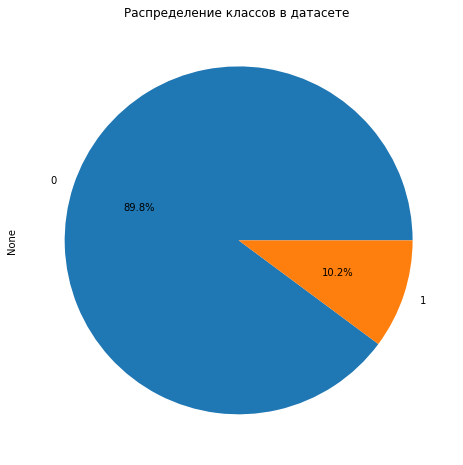

In [8]:
#визуальное представление
data.groupby('toxic').size().plot(kind='pie',
                                  y = "toxic",
                                  autopct='%1.1f%%',
                                  figsize=(8,8),
                                  title='Распределение классов в датасете ');

Классы несбалансированы.

### Подготовка данных к обучению и тестированию моделей

In [9]:
#выделение лемматизированного корпуса текстов и разметки их токсичности
ml_data = data[['lemm_text', 'toxic']]

#деление на тренировочную и тестовую выборки
train_corpus, test_corpus, train_target, test_target = train_test_split(ml_data['lemm_text'], ml_data['toxic'], test_size=.1)

In [10]:
#деление на подвыборки для кросс-валидации
skf = StratifiedKFold(n_splits=3)

In [11]:
#функция построения ROC curve и вычисления показателя ROC-AUC 
def roc_auc_viz(model, features, target, sample_name=None):
    
    probabilities = model.predict_proba(features)

    fpr, tpr, _ = roc_curve(target, probabilities[:, 1])
    roc_auc = roc_auc_score(target, probabilities[:, 1])

    plt
    display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                estimator_name=f'ROC-AUC ({sample_name.lower()})')
    display.plot()
    plt.plot([0, 1], [0, 1], linestyle='--')
    if sample_name == None:
        plt.title('ROC-кривая')
        plt.show()
        print('ROC-AUC: ', auc_roc)
    else:
        plt.title(f'ROC-кривая ({sample_name.lower()})')
        plt.show()
        print(f'ROC-AUC ({sample_name.lower()}): ', roc_auc)
    return roc_auc

**Вывод по этапу:**
- данные загружены, произведена лемматизация и очистка текста от пунктуации и числовых символов
- данные разделены на тренировочную и тестовую выборки в соотношении 80 на 20
- дополнительно добавлена визуализация ROC-AUC

## Обучение

### Логистическая регрессия

In [12]:
%%time
#инициирование модели и сетки гиперпараметров

pipe = Pipeline(
    [
        ("vect", TfidfVectorizer()),
        ("clf", LogisticRegression(random_state=42, solver='liblinear', max_iter=200)),
    ]
)

params = {
    'vect__stop_words': ['english'],
    'vect__min_df': [10],
    'vect__max_df': [10000],
    
    'clf__penalty' : ['l1', 'l2'],
    'clf__C': list(range(1,15,3))
        }

#деление на подвыборки
folds = skf.split(train_corpus, train_target)

#подбор лучших гиперпараметров
grid = GridSearchCV(pipe, param_grid=params, scoring='f1', cv=folds, verbose=3, n_jobs=-1)
grid.fit(train_corpus, train_target)
best_logreg = grid.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END clf__C=1, clf__penalty=l1, vect__max_df=10000, vect__min_df=10, vect__stop_words=english; total time=   6.2s
[CV 2/3] END clf__C=1, clf__penalty=l1, vect__max_df=10000, vect__min_df=10, vect__stop_words=english; total time=   6.2s
[CV 3/3] END clf__C=1, clf__penalty=l1, vect__max_df=10000, vect__min_df=10, vect__stop_words=english; total time=   6.3s
[CV 1/3] END clf__C=1, clf__penalty=l2, vect__max_df=10000, vect__min_df=10, vect__stop_words=english; total time=  11.4s
[CV 2/3] END clf__C=1, clf__penalty=l2, vect__max_df=10000, vect__min_df=10, vect__stop_words=english; total time=  12.5s
[CV 3/3] END clf__C=1, clf__penalty=l2, vect__max_df=10000, vect__min_df=10, vect__stop_words=english; total time=  11.5s
[CV 1/3] END clf__C=4, clf__penalty=l1, vect__max_df=10000, vect__min_df=10, vect__stop_words=english; total time=   6.5s
[CV 2/3] END clf__C=4, clf__penalty=l1, vect__max_df=10000, vect__min_df=10, vect__st

In [13]:
print('Лучшая модель:', grid.best_params_)
print('Лучшая F1-метрика:', grid.best_score_)

Лучшая модель: {'clf__C': 4, 'clf__penalty': 'l1', 'vect__max_df': 10000, 'vect__min_df': 10, 'vect__stop_words': 'english'}
Лучшая F1-метрика: 0.7738872333522521


### Дерево решений

In [48]:
#сетка гиперпараметров
pipe = Pipeline(
    [
        ("vect", TfidfVectorizer()),
        ("clf", DecisionTreeClassifier(random_state=12345)),
    ]
)

dtc_params = {
    'vect__stop_words': ['english'],
    'vect__min_df': [10],
    'vect__max_df': [10000],
    
    'clf__max_depth': range(3,15,4),         
    'clf__min_samples_split':range(2,10,3)}
#деление на подвыборки
folds = skf.split(train_corpus, train_target)

print('Ищем лучшую модель дерева решений...')
#подбор лучших гиперпараметров
grid = GridSearchCV(pipe, dtc_params, cv=folds, scoring='f1', verbose=2)
grid.fit(train_corpus, train_target)
best_dtc = grid.best_estimator_

Ищем лучшую модель дерева решений...
Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END clf__max_depth=3, clf__min_samples_split=2, vect__max_df=10000, vect__min_df=10, vect__stop_words=english; total time=   6.2s
[CV] END clf__max_depth=3, clf__min_samples_split=2, vect__max_df=10000, vect__min_df=10, vect__stop_words=english; total time=   6.0s
[CV] END clf__max_depth=3, clf__min_samples_split=2, vect__max_df=10000, vect__min_df=10, vect__stop_words=english; total time=   6.0s
[CV] END clf__max_depth=3, clf__min_samples_split=5, vect__max_df=10000, vect__min_df=10, vect__stop_words=english; total time=   6.0s
[CV] END clf__max_depth=3, clf__min_samples_split=5, vect__max_df=10000, vect__min_df=10, vect__stop_words=english; total time=   6.4s
[CV] END clf__max_depth=3, clf__min_samples_split=5, vect__max_df=10000, vect__min_df=10, vect__stop_words=english; total time=   6.1s
[CV] END clf__max_depth=3, clf__min_samples_split=8, vect__max_df=10000, vect__min_df=10, vec

In [49]:
print('Лучшая модель дерева решений: ', grid.best_params_)
print('Лучшее значение F1-метрики:', grid.best_score_)

Лучшая модель дерева решений:  {'clf__max_depth': 11, 'clf__min_samples_split': 8, 'vect__max_df': 10000, 'vect__min_df': 10, 'vect__stop_words': 'english'}
Лучшее значение F1-метрики: 0.6104544148416963


### Случайный лес

In [50]:
pipe = Pipeline(
    [
        ("vect", TfidfVectorizer()),
        ("clf", RandomForestClassifier(random_state=12345)),
    ]
)

#сетка гиперпараметров
rfc_params = {
    'vect__stop_words': ['english'],
    'vect__min_df': [10],
    'vect__max_df': [10000],
    
    'clf__max_depth': range(1,10, 2), 
    'clf__n_estimators': [60, 100, 150]}
#деление на подвыборки
folds = skf.split(train_corpus, train_target)

print('Ищем лучшую модель случайного леса...')
grid = GridSearchCV(pipe, 
                    rfc_params, 
                    scoring='f1', 
                    cv=folds, 
                    verbose=2)
grid.fit(train_corpus, train_target)
best_rf_clf = grid.best_estimator_

Ищем лучшую модель случайного леса...
Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] END clf__max_depth=1, clf__n_estimators=60, vect__max_df=10000, vect__min_df=10, vect__stop_words=english; total time=   6.1s
[CV] END clf__max_depth=1, clf__n_estimators=60, vect__max_df=10000, vect__min_df=10, vect__stop_words=english; total time=   6.1s
[CV] END clf__max_depth=1, clf__n_estimators=60, vect__max_df=10000, vect__min_df=10, vect__stop_words=english; total time=   6.5s
[CV] END clf__max_depth=1, clf__n_estimators=100, vect__max_df=10000, vect__min_df=10, vect__stop_words=english; total time=   7.1s
[CV] END clf__max_depth=1, clf__n_estimators=100, vect__max_df=10000, vect__min_df=10, vect__stop_words=english; total time=   6.7s
[CV] END clf__max_depth=1, clf__n_estimators=100, vect__max_df=10000, vect__min_df=10, vect__stop_words=english; total time=   6.9s
[CV] END clf__max_depth=1, clf__n_estimators=150, vect__max_df=10000, vect__min_df=10, vect__stop_words=english;

In [51]:
print('Лучшая модель случайного леса: ', grid.best_params_, '\n')
print('Лучшее значение F1-метрики:', grid.best_score_)

Лучшая модель случайного леса:  {'clf__max_depth': 9, 'clf__n_estimators': 60, 'vect__max_df': 10000, 'vect__min_df': 10, 'vect__stop_words': 'english'} 

Лучшее значение F1-метрики: 0.007915571366341148


### Кросс-валидация модели градиентного бустинга CatBoost

In [ ]:
tf_idf = TfidfVectorizer(stop_words=stopwords, min_df = 10, max_df=10000)

corpus_train_vec = tf_idf.fit_transform(train_corpus)
corpus_test_vec = tf_idf.transform(test_corpus)

print(corpus_train_vec.shape, corpus_test_vec.shape)

In [ ]:
#создание датасета для обучения
cv_dataset = Pool(data=corpus_train_vec,
                  label=train_target)

#параметры градиентного бустинга
params = {"iterations": 1000,
          'learning_rate': 0.2,
          "depth": 7,
          'loss_function': 'Logloss',
          "eval_metric": "F1",
          "verbose": False,
         'random_seed': 42,
         'early_stopping_rounds': 10}

#кросс-валидация
scores = cv(cv_dataset,
            params,
            fold_count=3, 
            plot="True")

In [14]:
pipe = Pipeline(
    [
        ("vect", TfidfVectorizer()),
        ("clf", CatBoostClassifier()),
    ]
)

#сетка гиперпараметров
cb_params = {
    'vect__stop_words': ['english'],
    'vect__min_df': [10],
    'vect__max_df': [10000],
    
    "clf__iterations": [400],
    'clf__learning_rate': [0.2],
    "clf__depth": [7],
    'clf__loss_function': ['Logloss'],
    "clf__eval_metric": ["F1"],
    'clf__random_seed': [42],
    'clf__early_stopping_rounds': [10]}
#деление на подвыборки
folds = skf.split(train_corpus, train_target)

print('Кросс-валидация градиентного бустинга')
grid = GridSearchCV(pipe, 
                    cb_params, 
                    scoring='f1', 
                    cv=folds, 
                    verbose=2)
grid.fit(train_corpus, train_target)

Кросс-валидация градиентного бустинга
Fitting 3 folds for each of 1 candidates, totalling 3 fits
0:	learn: 0.4311100	total: 2.66s	remaining: 17m 40s
1:	learn: 0.4695815	total: 4.47s	remaining: 14m 49s
2:	learn: 0.4788906	total: 6.27s	remaining: 13m 49s
3:	learn: 0.4827267	total: 8.05s	remaining: 13m 16s
4:	learn: 0.5055412	total: 9.96s	remaining: 13m 7s
5:	learn: 0.5101362	total: 11.9s	remaining: 13m 3s
6:	learn: 0.5440873	total: 13.7s	remaining: 12m 51s
7:	learn: 0.5414243	total: 15.6s	remaining: 12m 42s
8:	learn: 0.5581699	total: 17.3s	remaining: 12m 33s
9:	learn: 0.5602094	total: 19.2s	remaining: 12m 28s
10:	learn: 0.5746398	total: 21s	remaining: 12m 23s
11:	learn: 0.5642702	total: 22.8s	remaining: 12m 18s
12:	learn: 0.5672053	total: 24.5s	remaining: 12m 9s
13:	learn: 0.5701685	total: 26.3s	remaining: 12m 4s
14:	learn: 0.5604668	total: 28.1s	remaining: 12m
15:	learn: 0.5628368	total: 30s	remaining: 12m
16:	learn: 0.5868759	total: 31.9s	remaining: 11m 58s
17:	learn: 0.6019417	total: 

GridSearchCV(cv=<generator object _BaseKFold.split at 0x7fdc43e515f0>,
             estimator=Pipeline(steps=[('vect', TfidfVectorizer()),
                                       ('clf',
                                        <catboost.core.CatBoostClassifier object at 0x7fdc45106f10>)]),
             param_grid={'clf__depth': [7], 'clf__early_stopping_rounds': [10],
                         'clf__eval_metric': ['F1'], 'clf__iterations': [400],
                         'clf__learning_rate': [0.2],
                         'clf__loss_function': ['Logloss'],
                         'clf__random_seed': [42], 'vect__max_df': [10000],
                         'vect__min_df': [10],
                         'vect__stop_words': ['english']},
             scoring='f1', verbose=2)

In [15]:
print('Среднее значение F1-метрики:', grid.best_score_)

Среднее значение F1-метрики: 0.750747506709159


Лучшей моделью оказалась логистическая регрессия: у нее самый высокий показатель F1-меры и наиболее быстрое время обучения. Градиентный бустинг также превысил целевой показатель F1-меры, однако обучение заняло около часа.

### Тестирование лучшей модели

In [17]:
predictions = best_logreg.predict(test_corpus)

f1_score(test_target, predictions)

0.8001334668001335

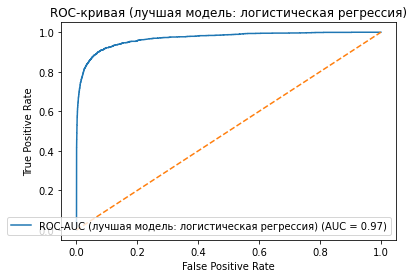

ROC-AUC (лучшая модель: логистическая регрессия):  0.9692697670529555


0.9692697670529555

In [19]:
roc_auc_viz(best_logreg, test_corpus, test_target, sample_name='Лучшая модель: логистическая регрессия')

**Вывод по этапу:**
- были протестированы модели логистической регрессии, дерева решений, случайного леса и градиентного бустинга
- с точки зрения затрат на обучение и подбор гиперпараметров лучшей оказалась модель логистической регрессии
- градиентный бустинг также показал хорошие результаты F1-меры, однако значения метрики оказались ниже, а обучение с кросс-валидацией заняло около часа

## Выводы

Лучшей моделью оказалась логистическая регрессия: у нее самый высокий показатель F1-меры и наиболее быстрое время обучения. Градиентный бустинг также превысил целевой показатель F1-меры >= 0,75, однако обучение заняло больше часа. На тестовой выборке значение F1-меры лучшей модели достигло 0.8.